In [1]:
%matplotlib inline
from brian2 import *
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# clear_cache('cython')

In [4]:
ps1 = {
    "MEMBRANE_TIME_SCALE_tau_m" : 5 * ms,
    "MEMBRANE_RESISTANCE_R" : 500*Mohm,
    "V_REST" : -70.0 * mV,
    "V_RESET" : -51.0 * mV,
    "RHEOBASE_THRESHOLD_v_rh" : -50.0 * mV,
    "SHARPNESS_delta_T" : 2.0 * mV,
    "ADAPTATION_VOLTAGE_COUPLING_a" : 0.5 * nS,
    "ADAPTATION_TIME_CONSTANT_tau_w" : 100.0 * ms,
    "SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b" : 7.0 * pA
}

In [5]:
def get_step_current(t_start, t_end, t_total, unit_time, amplitudes):

    N = len(amplitudes)
    I_arr = np.zeros((t_total,N))*amp
    for i in range(N):
        I_arr[t_start : t_end+1, i] = amplitudes[i]
    
    I_arr = TimedArray(I_arr, dt = 1*unit_time)
    return I_arr

In [14]:
def AdEx(I_arr, duration, params, N_neurons, v_spike):

    tau_m = params["MEMBRANE_TIME_SCALE_tau_m"]
    R = params["MEMBRANE_RESISTANCE_R"]
    u_rest = params["V_REST"]
    u_reset = params["V_RESET"]
    u_rh = params["RHEOBASE_THRESHOLD_v_rh"]
    DeltaT = params["SHARPNESS_delta_T"]
    a = params["ADAPTATION_VOLTAGE_COUPLING_a"]
    tau_w = params["ADAPTATION_TIME_CONSTANT_tau_w"]
    b = params["SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b"]

    eqs = ''' 
        I = I_arr(t,i) : amp
        du/dt = (-(u-u_rest) + DeltaT*exp((u-u_rh)/DeltaT) - R*w + R*I )/tau_m : volt
        dw/dt = (a*(u-u_rest) - w)/tau_w : amp
    '''

    neuron = NeuronGroup(N_neurons, eqs, threshold = f"u > {v_spike/mV}*mV", reset="u = u_reset; w+=b",method=euler)
    neuron.u = u_rest
    neuron.w = 0*pA

    statemon = StateMonitor(neuron, ["u", "w", "I"], record = True)
    spikemon = SpikeMonitor(neuron)

    AE_net = Network(neuron)
    AE_net.add([statemon,spikemon])
    AE_net.run(duration)

    return statemon, spikemon

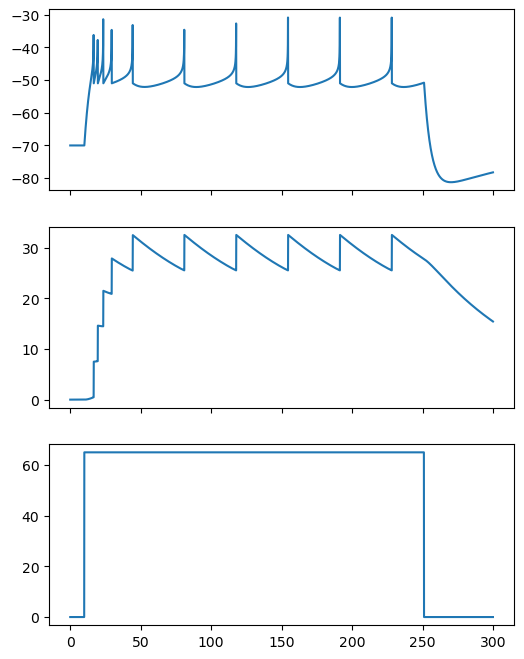

In [17]:
I_arr = get_step_current(10, 250, 300, 1. * ms, [65.0 * pA])
statemon, spikemon = AdEx(I_arr, 300*ms, ps1, 1, -30*mV)

fig,ax = plt.subplots(3, 1, figsize=(6,8),sharex=True)

ax[0].plot(statemon.t/ms, statemon.u[0]/mV)
ax[1].plot(statemon.t/ms, statemon.w[0]/pA)
ax[2].plot(statemon.t/ms, statemon.I[0]/pA)

# 3.1. Exercise: Adaptation and firing patterns

### Adapting

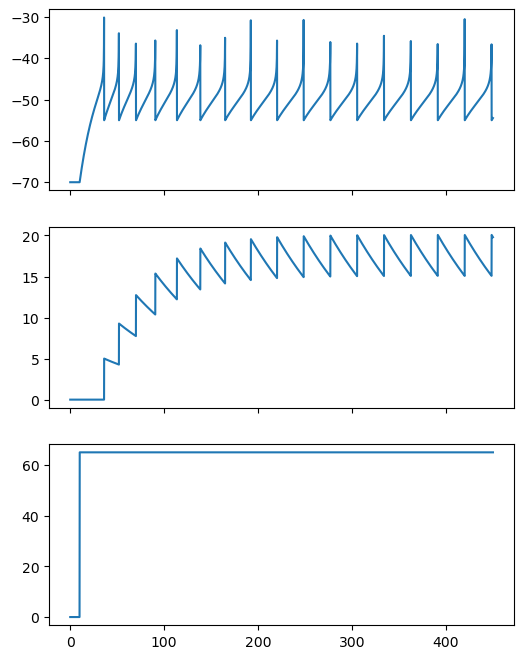

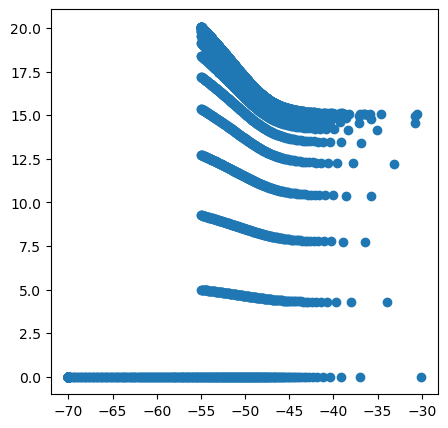

In [28]:
ps2 = ps1.copy()

ps2["MEMBRANE_TIME_SCALE_tau_m"] = 20*ms
ps2["ADAPTATION_VOLTAGE_COUPLING_a"] = 0*nsiemens
ps2["ADAPTATION_TIME_CONSTANT_tau_w"] = 100*ms
ps2["SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b"] = 5*pA
ps2["V_RESET"] = -55*mV

I_arr = get_step_current(10, 450, 450, 1. * ms, [65.0 * pA])
statemon, spikemon = AdEx(I_arr, 450*ms, ps2, 1, -30*mV)

fig,ax = plt.subplots(3, 1, figsize=(6,8),sharex=True)

ax[0].plot(statemon.t/ms, statemon.u[0]/mV)
ax[1].plot(statemon.t/ms, statemon.w[0]/pA)
ax[2].plot(statemon.t/ms, statemon.I[0]/pA)

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(statemon.u[0]/mV, statemon.w[0]/pA)

### Bursting

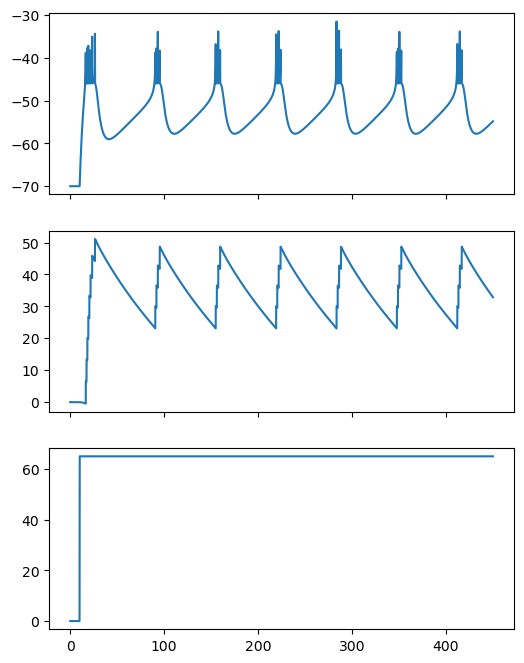

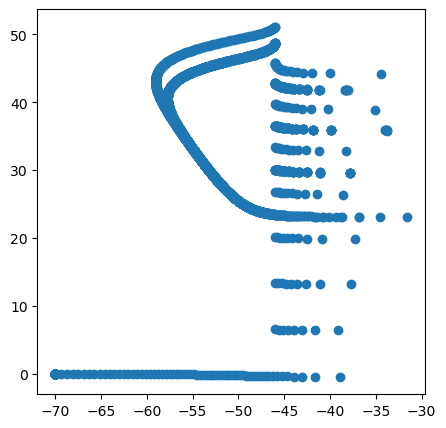

In [30]:
ps3 = ps1.copy()

ps3["MEMBRANE_TIME_SCALE_tau_m"] = 5*ms
ps3["ADAPTATION_VOLTAGE_COUPLING_a"] = -0.5*nsiemens
ps3["ADAPTATION_TIME_CONSTANT_tau_w"] = 100*ms
ps3["SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b"] = 7*pA
ps3["V_RESET"] = -46*mV

I_arr = get_step_current(10, 450, 450, 1. * ms, [65.0 * pA])
statemon, spikemon = AdEx(I_arr, 450*ms, ps3, 1, -30*mV)

fig,ax = plt.subplots(3, 1, figsize=(6,8),sharex=True)

ax[0].plot(statemon.t/ms, statemon.u[0]/mV)
ax[1].plot(statemon.t/ms, statemon.w[0]/pA)
ax[2].plot(statemon.t/ms, statemon.I[0]/pA)

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(statemon.u[0]/mV, statemon.w[0]/pA)

### Irregular

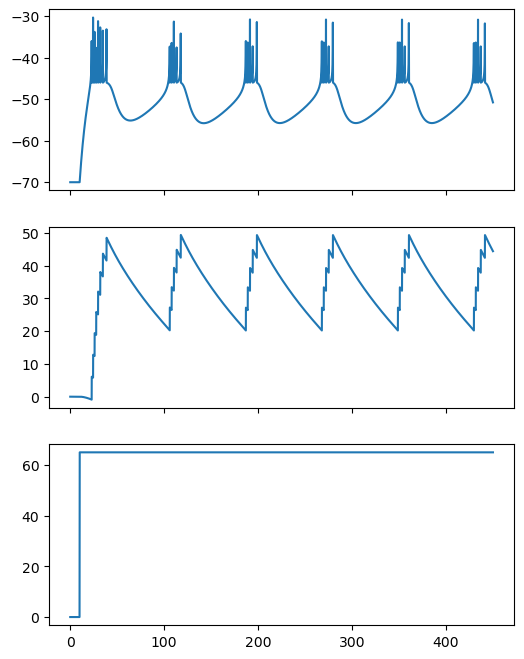

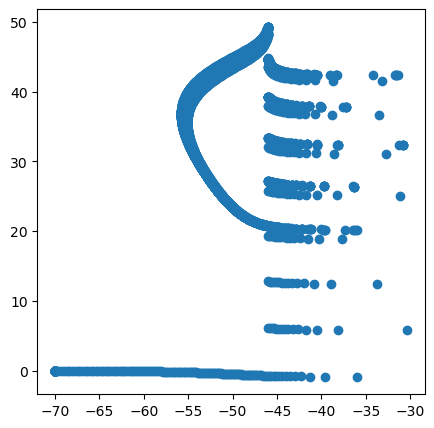

In [31]:
ps4 = ps1.copy()

ps4["MEMBRANE_TIME_SCALE_tau_m"] = 9.9*ms
ps4["ADAPTATION_VOLTAGE_COUPLING_a"] = -0.5*nsiemens
ps4["ADAPTATION_TIME_CONSTANT_tau_w"] = 100*ms
ps4["SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b"] = 7*pA
ps4["V_RESET"] = -46*mV

I_arr = get_step_current(10, 450, 450, 1. * ms, [65.0 * pA])
statemon, spikemon = AdEx(I_arr, 450*ms, ps4, 1, -30*mV)

fig,ax = plt.subplots(3, 1, figsize=(6,8),sharex=True)

ax[0].plot(statemon.t/ms, statemon.u[0]/mV)
ax[1].plot(statemon.t/ms, statemon.w[0]/pA)
ax[2].plot(statemon.t/ms, statemon.I[0]/pA)

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(statemon.u[0]/mV, statemon.w[0]/pA)